
## Background Information ##

Financial institutions, like Santander, help people and businesses prosper by providing tools and services to assess their personal financial health and to identify additional ways to help customers reach their monetary goals. In the United States, it is estimated that 40% of Americans cannot cover a $400 emergency expense1. As a result, it is imperative that financial institutions learn consumer habits to adopt new technologies to better serve their financial needs. 

## Problem Statement
Santander, a financial institution, is trying to predict the next transaction a given customer is trying to complete based on historical banking information. This is a binary classification problem where the input data contains 299 unnamed normally-distributed feature variables. The solution to this problem will be evaluated on a provided test data set by Santander.

## Solution Statement #

The provided train.csv file contains 200,000 unique rows corresponding to customer data. Given the large dataset, and the need to complete binary classification, there are many solutions to this problem: mine will involve using a deep neural network, after preprocessing the inputs by normalizing and scaling features, to classify the two target variables. After the model is trained and validated on a subset of the data from the train.csv file, I will run my trained model on the provided test set from Santander and measure the accuracy of each prediction.

## Load Data 

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split


import os
#print(os.listdir("../input"))

# Pretty display for notebooks
%matplotlib inline

# Load the Santander dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test 2.csv')
submission_data = pd.read_csv('sample_submission.csv')

## Data Exploration & Visualizations ## 


In [5]:
#Size of training data
train_data.shape

(200000, 202)

In [6]:
train_data['target'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [7]:
train_data.describe()


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Immediate Key Takeaways: The mean, standard deviation, and maximum values of the features vary widely; if we choose to implement a black-box algorithm, like neural networks, a key step will be data preprocessing, which will involve feature scaling, potentially outlier-detection and removal, and definitely normalization of these variables.



 ### Separate Training and Validation Datasets


In [8]:
feature_train_data = train_data.drop(['ID_code','target'], axis=1) #remove target column & ID column

#Split the dataset into training and validation sets so that we can implement models without touching 
#the test set
X_train, X_val, y_train, y_val = train_test_split(feature_train_data, train_data['target'], test_size = 0.20, random_state = 25)

In [9]:
X_train.describe()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,10.681382,-1.623837,10.711821,6.794069,11.077668,-5.077372,5.409279,16.546912,0.284118,7.568004,...,3.230005,7.436791,1.926926,3.332795,17.997501,-0.144267,2.314635,8.908480,15.870116,-3.338233
std,3.039535,4.050045,2.638762,2.042188,1.624882,7.857217,0.866111,3.419261,3.333060,1.233783,...,4.560972,3.020978,1.477650,3.992125,3.137006,1.429955,5.448952,0.921249,3.008499,10.425921
min,0.408400,-15.043400,2.117100,0.016200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.566800,-10.845500,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.457600,-4.735600,8.720700,5.250900,9.881400,-11.220300,4.769500,13.944000,-2.320125,6.619900,...,-0.067525,5.159075,0.890175,0.582600,15.631650,-1.173700,-1.921000,8.253400,13.830975,-11.208225
50%,10.524950,-1.599500,10.569900,6.820550,11.107200,-4.841900,5.384750,16.463550,0.394250,7.630500,...,3.196000,7.350300,1.898600,3.391300,17.964700,-0.174700,2.418200,8.887500,15.936100,-2.840800
75%,12.762925,1.362200,12.514500,8.319000,12.261525,0.907900,6.003000,19.100325,2.940100,8.584500,...,6.403450,9.505400,2.949400,6.204900,20.400900,0.829300,6.557000,9.593800,18.066500,4.818000
max,20.315000,10.335600,19.353000,13.188300,16.671400,17.251600,8.447700,27.638900,10.151300,11.150600,...,18.440900,16.716500,7.811100,18.281800,27.928800,4.255700,18.321500,12.000400,26.079100,27.534000


From the dataset statistics, we can see that the mean and standard deviatation of each var feature significantly varies. If we apply supervised learning algorithms without any feature scaling or preprocessing, the algorithm will bias to certain features over others when learning the relationship between the input features and the target classification of the customer.

Binary classification without any preprocessing using a simple decision tree classifier could provide insight into what minimum baseline performance we achieve.



### Develop simple model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train, y_train)

y_pred = treeClassifier.predict(X_val)

# TODO: Report the score of the prediction using the testing set
score = accuracy_score(y_val, y_pred)

In [11]:
score

0.83352499999999996

In [12]:
#Prepare input and output; use decision tree classifier to make predictions 
X_test = test_data.drop('ID_code', axis=1)
y_test_ID = test_data['ID_code']
y_pred_testSet = treeClassifier.predict(X_test)

#Convert array into panda dataframe
F=pd.DataFrame(np.vstack(y_pred_testSet) , columns = ['target'])

#Build output submission dataframe
competitionSub = pd.concat([y_test_ID, F], axis=1)
competitionSub.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


### Analyzing Model Performance - Decision Tree


On the test set, when we submit to Kaggle, a decision tree classifier gets us 55% accuracy, which is slightly better than random guessing. Alas, it's not a great solution to this problem and now we'll dive deeper into data exploration. (I placed 7,000+, YIKES!)

If we saw redundant features in the dataset, we might see strong linear correlatations to multiple features; this also lets us see whether or not our features are normally distributed or if the dataset contains any outliers that could skew our results.



In [13]:
feature_train_data.corr()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,-0.005279,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,-0.005697,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,0.002885,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,-0.001073,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854
var_9,-0.002613,-0.000832,-0.001932,-0.000826,-0.000918,-0.005279,-5.696919e-03,0.002885,-0.001073,1.000000,...,-0.000871,-0.002371,-0.000014,-0.001407,0.003099,-0.000868,0.000052,0.003701,0.002343,0.001070


### Transforming & Normalizing Numerical Features
If our data is not normally distributed, especially if the mean and medians vary significantly (indicating a large skew in the data), it's appropriate to apply a non-linear scaling to reduce this; one example is applying the natural logarithm to the dataset.

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning. Care must be taken when applying this transformation

In [15]:
#Normalize the feature_train_data
#Get all the names for continous variable columns
cont_columns = list(feature_train_data.columns.values)
cont_columns[180:] #sample list of strings of each column in dataframe

['var_180',
 'var_181',
 'var_182',
 'var_183',
 'var_184',
 'var_185',
 'var_186',
 'var_187',
 'var_188',
 'var_189',
 'var_190',
 'var_191',
 'var_192',
 'var_193',
 'var_194',
 'var_195',
 'var_196',
 'var_197',
 'var_198',
 'var_199']

In [16]:
scaled_features_train = {} #store scaling values for conversion back to original values later on
scaled_features_test = {} #store scaling values for conversion back to original values later on

feature_test_data = test_data.drop(['ID_code'], axis=1)

#Continuous Variables are set to be between 0 & 1 and to have zero mean and a standard deviation of 1# Yielded 91% accuracy with 50 epochs
for each in cont_columns:
    mean_train, std_train =feature_train_data[each].mean(), feature_train_data[each].std()
    scaled_features_train[each]= [mean_train , std_train]
    feature_train_data.loc[:,each] = (feature_train_data[each] - mean_train)/std_train
    
    mean_test, std_test = feature_test_data[each].mean(), feature_test_data[each].std()
    scaled_features_test[each]= [mean_test , std_test]
    feature_test_data.loc[:,each] = (feature_test_data[each] - mean_test)/std_test

In [17]:
feature_train_data.describe()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,-4.956882e-14,-1.879419e-15,-2.766382e-14,-8.763211e-15,-7.285212e-14,-4.061463e-15,4.807607e-14,-3.157238e-14,1.150321e-15,6.398424e-14,...,7.705522e-15,-1.444120e-14,-2.061551e-14,-5.306084e-15,2.592628e-15,3.543802e-15,-3.398115e-15,1.075441e-14,-1.733002e-13,-1.298059e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.378731e+00,-3.312502e+00,-3.255750e+00,-3.345894e+00,-3.698694e+00,-3.496929e+00,-3.532914e+00,-3.275571e+00,-3.237578e+00,-2.912172e+00,...,-3.800008e+00,-3.350710e+00,-3.884097e+00,-3.786337e+00,-2.966157e+00,-3.581230e+00,-3.027469e+00,-3.198216e+00,-3.178875e+00,-3.403546e+00
25%,-7.322457e-01,-7.684863e-01,-7.545614e-01,-7.548768e-01,-7.363205e-01,-7.802142e-01,-7.399530e-01,-7.612617e-01,-7.807525e-01,-7.679212e-01,...,-7.222196e-01,-7.544834e-01,-7.021425e-01,-6.881645e-01,-7.540230e-01,-7.196246e-01,-7.792396e-01,-7.110889e-01,-6.778669e-01,-7.551185e-01
50%,-5.104002e-02,4.832463e-03,-5.119170e-02,1.393363e-02,1.843130e-02,2.952558e-02,-2.751960e-02,-2.605264e-02,3.286835e-02,5.049401e-02,...,-6.763225e-03,-2.998683e-02,-1.795056e-02,1.617631e-02,-1.142977e-02,-2.141609e-02,1.935416e-02,-2.165487e-02,2.103318e-02,4.857120e-02
75%,6.836352e-01,7.373368e-01,6.821584e-01,7.475929e-01,7.287017e-01,7.617849e-01,6.854908e-01,7.480964e-01,7.962886e-01,8.235879e-01,...,6.955734e-01,6.860503e-01,6.910482e-01,7.199410e-01,7.663849e-01,6.798008e-01,7.798133e-01,7.434064e-01,7.286763e-01,7.820775e-01
max,3.169383e+00,2.964022e+00,3.270789e+00,3.128132e+00,3.445811e+00,2.838123e+00,3.506492e+00,3.260885e+00,2.960763e+00,2.901345e+00,...,3.334807e+00,3.068891e+00,4.379370e+00,3.744968e+00,3.168900e+00,3.088760e+00,2.936758e+00,3.355205e+00,3.390423e+00,3.049166e+00


Key takeaway: Look closely at the standard deviation, mean, min, and max of some of the first few var features. We standardized it and made the mean approach the value of 0, meaning that a supervised learning algorithm can now take these inputs and output a more equal understanding of the blend of features to identify the two targets.

From another posted kernel on Kaggle, we observed that this was an unbalanced classification challenge (Link: https://www.kaggle.com/allunia/santander-customer-transaction-eda)

So, I used their visualization as inspiration to provide readers of this kernel a figure to view:

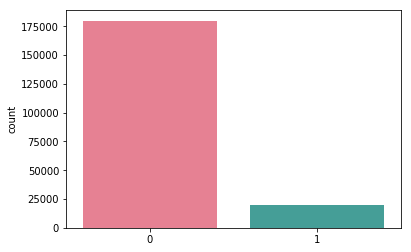

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(train_data.target.values, palette="husl")

### Implementing Dimensionality Reduction (Principal Component Analysis)¶
It's worth understand how much of the input data is redundant, or less important when classifying the two classes. In our case, we'll implement Principal Component Analysis (PCA), a form of unsupervised learning, that will define how much of the dataset's variance is explained by a number of features we choose to explore. We'll work with the original data and NOT the data that was normalized with zero mean and standard deviation of 1. That makes it harder to figure out which feature is most responsible for the variance in the dataset.

In [19]:
from sklearn.decomposition import PCA

#Separate preprocessed training and validation sets
X_train_prep, X_val_prep, y_train, y_val = train_test_split(feature_train_data, train_data['target'], test_size = 0.20, random_state = 25)

# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 5

#Extracting the top input variables from 200,000 samples of training data after standard scaling
#was applied; capture 95% of the variance in the number of components we are reducing down to.
pca = PCA(.95,
          whiten=True).fit(X_train_prep)

#Projecting the input data onto the most important principal axises
X_train_pca = pca.transform(X_train_prep)
X_val_pca = pca.transform(X_val_prep)
pca.explained_variance_ratio_.cumsum()

array([ 0.0061057 ,  0.01145764,  0.01680478,  0.02213524,  0.02746308,
        0.03278042,  0.03808694,  0.04338689,  0.04868275,  0.0539736 ,
        0.05925967,  0.06454142,  0.06982117,  0.0750976 ,  0.0803687 ,
        0.08562978,  0.09088761,  0.09614396,  0.10139119,  0.10663652,
        0.11187465,  0.11711039,  0.1223431 ,  0.12756982,  0.13279238,
        0.13801382,  0.14322912,  0.14843992,  0.15364955,  0.15885506,
        0.16405666,  0.16925633,  0.17445173,  0.17964523,  0.18483363,
        0.19001956,  0.19520143,  0.20038142,  0.2055542 ,  0.2107243 ,
        0.21589407,  0.22105489,  0.22621346,  0.231371  ,  0.23652386,
        0.2416735 ,  0.24681751,  0.25195777,  0.25709558,  0.26223086,
        0.26736344,  0.27249563,  0.27762566,  0.28275195,  0.28787675,
        0.29299683,  0.29811272,  0.3032276 ,  0.30833746,  0.31344648,
        0.31855083,  0.32365326,  0.32874928,  0.33384347,  0.33893528,
        0.3440247 ,  0.34911146,  0.35419704,  0.35927994,  0.36

Key takeaway: We can confirm that the cumulative sum of the variance explained by the features is 0.9531571, a number we set when we implemented PCA above.



In [20]:
 pca.n_components_


190

key takeaway: it looks like that with 190 of the 200 features, we can capture 95% of the variance of the data. We reduced the dimensions, but it's worthwhile to note that this is not a significant reduction in dimensionality of the training data.



### Performing PCA on Original Dataset For Comparison


In [21]:
#Extracting the top input variables from 200,000 samples of training data after standard scaling
#was applied; capture 95% of the variance in the number of components we are reducing down to.
pca1 = PCA(.95,
          whiten=True).fit(X_train)

#Projecting the input data onto the most important principal axises
X_train_pca1 = pca1.transform(X_train)
X_val_pca1 = pca1.transform(X_val)


In [22]:
 pca1.n_components_


111

Key takeaway: PCA on the original training set, without any standard scaling (i.e., setting the mean to 0 and standard deviation to 1 for each feature), yields fewer principal components that capture 95% of the variance in the data.



In [23]:
from sklearn.linear_model import LogisticRegression

#Use PCA values from the preprocessed input data after mean is set to zero and standard devitation is set to 1.
logisticRegr0 = LogisticRegression(solver = 'lbfgs')
logisticRegr0.fit(X_train_pca, y_train)
y_pred_logisticRegr0 = logisticRegr0.predict(X_val_pca)

logisticRegr1 = LogisticRegression(solver = 'lbfgs')
logisticRegr1.fit(X_train_pca1, y_train)
y_pred_logisticRegr1 = logisticRegr1.predict(X_val_pca1)

In [24]:
#This scores our logistic regression using the scaled data and after applying PCA; here we use 190 feature variables that capture 95% variance in the data
score0 = accuracy_score(y_val, y_pred_logisticRegr0)
score0

0.91422499999999995

In [25]:
#This scores our logistic regression using the raw data and after applying PCA; here we use 111 feature variables that capture 95% variance in the data

score1 = accuracy_score(y_val, y_pred_logisticRegr1)
score1

#On the submission page, this yielded a test set score of .

0.90422499999999995

Key Takeaway: It seems that a simple logistic regression performs better in the scenario where we set the mean to zero and the standard deviatation to 1 of the raw data provided. Then, we apply PCA and then we fit a logistic regression to the transformed feature data that captures 95% of the variance.

### Implement ADABoost


In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1)

bdt.fit(X_train_pca, y_train)
y_pred_bdt = bdt.predict(X_val_pca)
score_bdt = accuracy_score(y_val, y_pred_bdt)
score_bdt

0.89917499999999995

Key Takeaway: Here, we're using ensemble methods with AdaBoost to see if we can get a better results on the test set; we notice that score_bdt > score_0, which represented the logistic regression. Our submission result slightly increased to 0.637. Time to bring in the big guns... Neural Networks.m

## Implementing Neural Network ##


In [29]:
# Import Necessary Libraries
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
from keras.layers.normalization import BatchNormalization

#To get categorical output, we're going to one-hot encode the output vector for our train and validation dataset.
targets = np.array(keras.utils.to_categorical(y_train, 2))
targets_val = np.array(keras.utils.to_categorical(y_val, 2))

# Building the model
model = Sequential() #
model.add(Dense(1024, activation='relu', input_shape=(X_train_prep.shape[1],)))
#model.add(Dropout(rate=1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=1))
model.add(BatchNormalization())

model.add(Dense(254, activation='relu'))
#model.add(Dropout(rate=1))
model.add(BatchNormalization())

model.add(Dense(254, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())

model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=.1))
model.add(BatchNormalization())


model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              205824    
_________________________________________________________________
batch_normalization_14 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
__________

Notes for Building a Neural Network Architecture 1.) Beware overfitting: too many neurons, too many layers, or too little data will overfit your training set and result in worse performance on test set data.

2.) Batch normalization between relu activation functions is a good way to ensure samples are less skewed while entering subsequent layers. It is however, more computationally expensive to complete.

3.) Beware setting too many epochs to train. It leads to overfitting at times.

### Train Neural Network ####


In [37]:
targets_val?

In [38]:
X_val_prep?


In [39]:
X_train_prep?

In [40]:
targets?

In [41]:
from keras.callbacks import ModelCheckpoint  
# features and targets are Numpy arrays --just like in the Scikit-Learn API.

#Set hyperparameters 
epochs = 200
batch_size = 300

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(np.array(X_train_prep), targets,
          epochs=epochs, batch_size=batch_size,
          validation_data = (np.array(X_val_prep), targets_val), 
          callbacks=[checkpointer], verbose=1)

Train on 160000 samples, validate on 40000 samples
Epoch 1/200
160000/160000 [==============================] - 70s - loss: 0.4400 - acc: 0.8393 - val_loss: 0.2536 - val_acc: 0.9113
Epoch 2/200
160000/160000 [==============================] - 64s - loss: 0.2638 - acc: 0.9087 - val_loss: 0.2340 - val_acc: 0.9140
Epoch 3/200
160000/160000 [==============================] - 61s - loss: 0.2403 - acc: 0.9120 - val_loss: 0.2299 - val_acc: 0.9160
Epoch 4/200
160000/160000 [==============================] - 61s - loss: 0.2264 - acc: 0.9148 - val_loss: 0.2297 - val_acc: 0.9169
Epoch 5/200
160000/160000 [==============================] - 61s - loss: 0.2130 - acc: 0.9183 - val_loss: 0.2378 - val_acc: 0.9145
Epoch 6/200
160000/160000 [==============================] - 65s - loss: 0.2000 - acc: 0.9222 - val_loss: 0.2450 - val_acc: 0.9141
Epoch 7/200
160000/160000 [==============================] - 62s - loss: 0.1860 - acc: 0.9272 - val_loss: 0.2494 - val_acc: 0.9112
Epoch 8/200
160000/160000 [=====

160000/160000 [==============================] - 55s - loss: 0.0224 - acc: 0.9922 - val_loss: 0.5890 - val_acc: 0.8992
Epoch 32/200
160000/160000 [==============================] - 55s - loss: 0.0221 - acc: 0.9926 - val_loss: 0.6109 - val_acc: 0.8958
Epoch 33/200
160000/160000 [==============================] - 55s - loss: 0.0198 - acc: 0.9933 - val_loss: 0.6935 - val_acc: 0.8981
Epoch 34/200
160000/160000 [==============================] - 55s - loss: 0.0196 - acc: 0.9932 - val_loss: 0.6098 - val_acc: 0.8996
Epoch 35/200
160000/160000 [==============================] - 55s - loss: 0.0202 - acc: 0.9932 - val_loss: 0.6163 - val_acc: 0.8949
Epoch 36/200
160000/160000 [==============================] - 55s - loss: 0.0190 - acc: 0.9935 - val_loss: 0.6376 - val_acc: 0.8960
Epoch 37/200
160000/160000 [==============================] - 55s - loss: 0.0183 - acc: 0.9939 - val_loss: 0.7365 - val_acc: 0.8995
Epoch 38/200
160000/160000 [==============================] - 55s - loss: 0.0170 - acc: 0

160000/160000 [==============================] - 55s - loss: 0.0103 - acc: 0.9967 - val_loss: 0.7620 - val_acc: 0.9041
Epoch 64/200
160000/160000 [==============================] - 55s - loss: 0.0113 - acc: 0.9963 - val_loss: 0.6923 - val_acc: 0.9000
Epoch 65/200
160000/160000 [==============================] - 55s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.8074 - val_acc: 0.9020
Epoch 66/200
160000/160000 [==============================] - 55s - loss: 0.0097 - acc: 0.9968 - val_loss: 0.7555 - val_acc: 0.8990
Epoch 67/200
160000/160000 [==============================] - 55s - loss: 0.0103 - acc: 0.9964 - val_loss: 0.6820 - val_acc: 0.8985
Epoch 68/200
160000/160000 [==============================] - 55s - loss: 0.0086 - acc: 0.9973 - val_loss: 0.6196 - val_acc: 0.9004
Epoch 69/200
160000/160000 [==============================] - 55s - loss: 0.0089 - acc: 0.9970 - val_loss: 0.6265 - val_acc: 0.9016
Epoch 70/200
160000/160000 [==============================] - 59s - loss: 0.0102 - acc: 0

160000/160000 [==============================] - 61s - loss: 0.0066 - acc: 0.9980 - val_loss: 0.7385 - val_acc: 0.9032
Epoch 96/200
160000/160000 [==============================] - 60s - loss: 0.0056 - acc: 0.9982 - val_loss: 0.8184 - val_acc: 0.9012
Epoch 97/200
160000/160000 [==============================] - 60s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.9142 - val_acc: 0.9025
Epoch 98/200
160000/160000 [==============================] - 60s - loss: 0.0062 - acc: 0.9980 - val_loss: 0.8221 - val_acc: 0.9059
Epoch 99/200
160000/160000 [==============================] - 60s - loss: 0.0059 - acc: 0.9981 - val_loss: 0.8417 - val_acc: 0.9022
Epoch 100/200
160000/160000 [==============================] - 60s - loss: 0.0062 - acc: 0.9980 - val_loss: 0.8558 - val_acc: 0.9046
Epoch 101/200
160000/160000 [==============================] - 60s - loss: 0.0063 - acc: 0.9979 - val_loss: 0.7814 - val_acc: 0.9021
Epoch 102/200
160000/160000 [==============================] - 57s - loss: 0.0058 - acc

160000/160000 [==============================] - 60s - loss: 0.0044 - acc: 0.9985 - val_loss: 0.9167 - val_acc: 0.9024
Epoch 128/200
160000/160000 [==============================] - 59s - loss: 0.0054 - acc: 0.9982 - val_loss: 0.9055 - val_acc: 0.9035
Epoch 129/200
160000/160000 [==============================] - 59s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.7794 - val_acc: 0.9020
Epoch 130/200
160000/160000 [==============================] - 63s - loss: 0.0056 - acc: 0.9982 - val_loss: 0.8409 - val_acc: 0.8996
Epoch 131/200
160000/160000 [==============================] - 62s - loss: 0.0045 - acc: 0.9986 - val_loss: 0.7552 - val_acc: 0.9049
Epoch 132/200
160000/160000 [==============================] - 60s - loss: 0.0041 - acc: 0.9988 - val_loss: 0.9321 - val_acc: 0.9031
Epoch 133/200
160000/160000 [==============================] - 60s - loss: 0.0042 - acc: 0.9987 - val_loss: 0.8494 - val_acc: 0.9034
Epoch 134/200
160000/160000 [==============================] - 60s - loss: 0.0054 -

160000/160000 [==============================] - 55s - loss: 0.0031 - acc: 0.9991 - val_loss: 0.8863 - val_acc: 0.9020
Epoch 160/200
160000/160000 [==============================] - 56s - loss: 0.0043 - acc: 0.9987 - val_loss: 0.9079 - val_acc: 0.8997
Epoch 161/200
160000/160000 [==============================] - 55s - loss: 0.0038 - acc: 0.9987 - val_loss: 0.9013 - val_acc: 0.9021
Epoch 162/200
160000/160000 [==============================] - 55s - loss: 0.0038 - acc: 0.9988 - val_loss: 0.8903 - val_acc: 0.9004
Epoch 163/200
160000/160000 [==============================] - 56s - loss: 0.0037 - acc: 0.9989 - val_loss: 0.9117 - val_acc: 0.8991
Epoch 164/200
160000/160000 [==============================] - 55s - loss: 0.0042 - acc: 0.9986 - val_loss: 0.9561 - val_acc: 0.9028
Epoch 165/200
160000/160000 [==============================] - 55s - loss: 0.0046 - acc: 0.9986 - val_loss: 0.9493 - val_acc: 0.8994
Epoch 166/200
160000/160000 [==============================] - 55s - loss: 0.0041 -

160000/160000 [==============================] - 56s - loss: 0.0035 - acc: 0.9990 - val_loss: 0.8559 - val_acc: 0.9022
Epoch 192/200
160000/160000 [==============================] - 56s - loss: 0.0033 - acc: 0.9990 - val_loss: 0.7984 - val_acc: 0.9029
Epoch 193/200
160000/160000 [==============================] - 57s - loss: 0.0041 - acc: 0.9987 - val_loss: 0.8930 - val_acc: 0.9039
Epoch 194/200
160000/160000 [==============================] - 58s - loss: 0.0034 - acc: 0.9989 - val_loss: 0.8219 - val_acc: 0.9047
Epoch 195/200
160000/160000 [==============================] - 55s - loss: 0.0034 - acc: 0.9990 - val_loss: 0.9520 - val_acc: 0.9017
Epoch 196/200
160000/160000 [==============================] - 56s - loss: 0.0026 - acc: 0.9992 - val_loss: 0.8748 - val_acc: 0.9030
Epoch 197/200
160000/160000 [==============================] - 55s - loss: 0.0033 - acc: 0.9990 - val_loss: 0.9683 - val_acc: 0.9031
Epoch 198/200
160000/160000 [==============================] - 56s - loss: 0.0035 -

In [43]:
#y_pred_nn = model.predict(X_val_pca)
#score_nn = accuracy_score(y_val, y_pred_nn)
#score_nn
best_weights_filepath = "weights.best.from_scratch.hdf5"
model.load_weights(best_weights_filepath)

score = model.evaluate(np.array(X_val_prep), targets_val)
print("\n Training Accuracy:", score[1])

39872/40000 [============================>.] - ETA: 0s
 Training Accuracy: 0.91685


### Test Set Neural Network Performance


In [44]:
feature_test_data.head()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.133981,2.327440,0.852788,1.286577,0.220421,0.339301,0.502073,0.507626,0.556963,1.007084,...,-1.174486,1.451556,-2.267582,-0.218044,-1.364610,1.818981,0.380898,1.962823,-0.131944,-0.526356
1,-0.700868,0.712421,0.226755,-0.780628,-1.162419,0.132014,0.699023,0.613949,-1.407053,-1.295196,...,1.631805,0.455056,-0.665991,1.703420,-0.770689,0.427339,-0.693327,1.041337,1.083557,-1.705006
2,-1.704485,-2.161573,-0.215177,0.126508,-0.503323,1.887814,-0.601564,1.087627,0.373845,0.628959,...,-0.865295,1.168598,0.036728,-0.285818,-1.597014,1.582004,-1.725836,-2.009577,1.338250,-1.916900
3,-0.698563,0.074754,0.499090,-0.103917,-1.379932,1.045197,-0.549869,1.178823,0.929498,-0.090600,...,1.401911,0.534952,-0.181048,0.064892,-0.894581,2.307692,0.305857,0.344305,-0.948040,-0.092749
4,0.344801,0.369147,1.299238,0.468834,-1.220509,-0.449118,1.670359,-1.729997,0.813549,-0.345580,...,0.227660,0.566586,-0.434094,0.013961,0.495831,-0.106558,-1.368275,-1.763732,-0.645851,-0.571064


In [46]:
#Prepare input and output; 
#Prepare input and output; use decision tree classifier to make predictions 
#X_test = pca.transform(feature_test_data)
X_test = feature_test_data

y_test = test_data['ID_code']
y_pred_testSet = model.predict(np.array(X_test))
y_pred_testSet=pd.DataFrame(y_pred_testSet)
y_pred_testSet = pd.concat([y_test, y_pred_testSet],axis=1)
y_pred_testSet['target'] = np.where(y_pred_testSet[0] > y_pred_testSet[1], 0, 1)
drop = [0,1]
submission=y_pred_testSet.drop(columns=drop, axis =1)

submission

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0


Key takeaways: The neural nets didn't do so hot! Submission score was .639. Now, we should probably try something like XGboost with GridSearchCV optimization to see if we can identify the most important features contributing to the targets and go from there.

In [47]:
submission.to_csv('Adrian_Lievano_NN', columns = ['ID_code','target'], index=False)


### Implement XGBoost Algorithm


In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42)

params = {
    "learning_rate": [0.03, .1, 0.3], # default 0.1 
    "max_depth": [2, 6], # default 3
    "n_estimators": [10, 20, 100], # default 100
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train_prep, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_pred_xgb = search.predict(X_val_prep)


In [ ]:
score_xgb = accuracy_score(y_val, y_pred_xgb)
score_xgb

In [ ]:
X_test = feature_test_data

y_test = test_data['ID_code']
y_pred_testSet = search.predict(X_test)
y_pred_testSet=pd.DataFrame(np.vstack(y_pred_testSet) , columns = ['target'])
competitionSub_xgb = pd.concat([y_test, y_pred_testSet], axis=1)
competitionSub_xgb

In [ ]:
competitionSub_xgb.to_csv('AAL_xgb.csv', columns = ['ID_code','target'], index = False)


Conclusions:

Supervised machine learning algorithms, including neural networks, are not enough to get the highest accuracy on the test set; instead, it's just as important to understand and visualize the statistics in your provided dataset.

This notebook walks Kagglers through a variety of supervised machine learning algorithms, presenting the tradeoffs and performance numbers on the test set for this data competition.

I still have much to learn!